In [8]:
# Paso 5: Regresión Logística

# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import dagshub
from dagshub import DAGsHubLogger
import mlflow
import pickle
from sklearn.metrics import  root_mean_squared_error
from sklearn.feature_extraction import  DictVectorizer

# Cargar el conjunto de datos
df = pd.read_csv("../data/waze_dataset.csv")
df.head(10)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [9]:
from dotenv import load_dotenv
import os

load_dotenv()
token = os.getenv("DAGSHUB_TOKEN")

In [10]:
DAGSHUB_USERNAME = "Parcex10"
DAGSHUB_REPO_NAME = "PROYECTO_OSKU"
DAGSHUB_TOKEN = token

# Configurar el tracking URI de MLflow
mlflow.set_tracking_uri(f"https://dagshub.com/{DAGSHUB_USERNAME}/{DAGSHUB_REPO_NAME}.mlflow")

# Autenticación con DagsHub
mlflow.set_experiment("model_experiment")

<Experiment: artifact_location='mlflow-artifacts:/57bd1ce7c19a48e0a7d07f64f62db70c', creation_time=1730432745321, experiment_id='0', last_update_time=1730432745321, lifecycle_stage='active', name='model_experiment', tags={}>

In [11]:
# Configuración del experiment logging
with DAGsHubLogger() as logger:
    with mlflow.start_run():
        # Aquí puedes poner tu código de entrenamiento
        # Ejemplo: model = train_model()

        # Registrar métricas
        mlflow.log_metric("accuracy", 0.95)
        mlflow.log_param("param1", "value1")

        # Guardar el modelo en MLflow
        mlflow.sklearn.log_model(model, "model")

TypeError: 'DAGsHubLogger' object does not support the context manager protocol

In [12]:
# Preprocesar los datos
df.dropna(inplace=True)  # Eliminar valores faltantes
X = df[['sessions', 'drives', 'total_sessions']]  # Seleccionar características
y = df['label'].apply(lambda x: 1 if x == 'retained' else 0)  # Convertir a variable binaria (1 para retenido, 0 para no retenido)

In [13]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [14]:
dagshub.init(url="https://dagshub.com/Parcex10/PROYECTO_OSKU", mlflow=True)

mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment(experiment_name="model_experiment")

Accessing as colome8

Initialized MLflow to track repo "Parcex10/PROYECTO_OSKU"

Repository Parcex10/PROYECTO_OSKU initialized!

<Experiment: artifact_location=('file:///c:/Users/colom/OneDrive - ITESO/iteso/5to '
 'semestre/cienciadatos/PROYECTO_OSKU/notebooks/mlruns/2'), creation_time=1730431426801, experiment_id='2', last_update_time=1730431426801, lifecycle_stage='active', name='model_experiment', tags={}>

In [15]:
dv = DictVectorizer()

In [16]:
# Crear un modelo de regresión logística
log_reg = LogisticRegression()

In [17]:
with mlflow.start_run(run_name="Model 1 Run"):
    
    model_class = log_reg  # Ya es una instancia
    model_name = type(model_class).__name__  # Obtener el nombre de la clase
    
    with mlflow.start_run(run_name=model_name, nested=True):
        
        ml_model = model_class
        
        ml_model.fit(X_train, y_train)
        
        y_pred = ml_model.predict(X_test)
        
        rmse = root_mean_squared_error(y_test, y_pred)
        mlflow.log_metric("rmse", rmse)

            
        '''
        # !mkdir models
        with open("models/preprocessor.b", "wb") as f_out:
            pickle.dump(dv, f_out)
                
        mlflow.log_artifact("models/preprocessor.b", artifact_path="preprocessor")
        '''

In [18]:
mlflow.sklearn.autolog()

In [ ]:
# Entrenar el modelo
log_reg.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Hacer predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test)

In [19]:
# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samp

In [20]:
# Imprimir las métricas de evaluación
print(f"Exactitud: {accuracy}")
print(f"Matriz de Confusión:\n{conf_matrix}")
print(f"Informe de Clasificación:\n{class_report}")

Exactitud: 0.8174825174825174
Matriz de Confusión:
[[   0  783]
 [   0 3507]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       783
           1       0.82      1.00      0.90      3507

    accuracy                           0.82      4290
   macro avg       0.41      0.50      0.45      4290
weighted avg       0.67      0.82      0.74      4290



Como el modelo está prediciendo únicamente la clase "1" (usuarios retenidos), es probable que haya un desbalance de clases en los datos. Esto hace que el modelo no identifique correctamente los usuarios no retenidos. Podríamos intentar mejorar el modelo balanceando las clases o utilizando otro enfoque.

In [23]:
!pip install imbalanced-learn

In [21]:
from sklearn.model_selection import cross_val_score

In [24]:
# Importar las bibliotecas necesarias
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos balanceados en conjuntos de entrenamiento y prueba
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# Crear y entrenar el modelo de regresión logística con los datos balanceados
log_reg_resampled = LogisticRegression()
log_reg_resampled.fit(X_train_resampled, y_train_resampled)

# Hacer predicciones en el conjunto de prueba
y_pred_resampled = log_reg_resampled.predict(X_test_resampled)

# Crear el informe de clasificación
class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)

# Mostrar los resultados
print(f"Exactitud: {accuracy_resampled}")
print(f"Informe de Clasificación:\n{class_report_resampled}")

2024/11/07 14:21:30 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '87107eb5d1974b719699cf59822668f5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/07 14:21:31 WARNING mlflow.sklearn: Training metrics will not be recorded because training labels were not specified. To automatically record training metrics, provide training labels as inputs to the model training function.
2024/11/07 14:21:31 WARNING mlflow.sklearn: Failed to infer model signature: the trained model does not have a `predict` or `transform` function, which is required in order to infer the signature
2024/11/07 14:21:31 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/11/07 14:22:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signatu

NameError: name 'accuracy_resampled' is not defined

A pesar de tener resultados menores, es una muestra de predicción más fiable y creíble ante nuestro conjunto de datos. Intentaremos aplicar otros modelos para que podamos afianzar mejores resultados.

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [26]:
# Comparar diferentes modelos
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

In [27]:
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train_resampled, y_train_resampled)
    
    # Hacer predicciones en el conjunto de prueba
    y_pred_resampled = model.predict(X_test_resampled)
    
    # Evaluar el modelo
    accuracy_resampled = accuracy_score(y_test_resampled, y_pred_resampled)
    conf_matrix_resampled = confusion_matrix(y_test_resampled, y_pred_resampled)
    class_report_resampled = classification_report(y_test_resampled, y_pred_resampled)

      # Imprimir los resultados
    print(f"--- {name} ---")
    print(f"Exactitud: {accuracy_resampled}")
    print(f"Matriz de Confusión:\n{conf_matrix_resampled}")
    print(f"Informe de Clasificación:\n{class_report_resampled}")

2024/11/07 14:22:52 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '18a9d3aac0314da39abef707641e360d', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/07 14:22:52 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missin

--- Logistic Regression ---
Exactitud: 0.5097761405497307
Matriz de Confusión:
[[1349 2193]
 [1267 2249]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.52      0.38      0.44      3542
           1       0.51      0.64      0.57      3516

    accuracy                           0.51      7058
   macro avg       0.51      0.51      0.50      7058
weighted avg       0.51      0.51      0.50      7058



2024/11/07 14:23:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/07 14:23:08 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning

--- Decision Tree ---
Exactitud: 0.7092660810427883
Matriz de Confusión:
[[2609  933]
 [1119 2397]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72      3542
           1       0.72      0.68      0.70      3516

    accuracy                           0.71      7058
   macro avg       0.71      0.71      0.71      7058
weighted avg       0.71      0.71      0.71      7058



2024/11/07 14:23:32 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/07 14:23:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning

--- Random Forest ---
Exactitud: 0.7174837064324171
Matriz de Confusión:
[[2665  877]
 [1117 2399]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.70      0.75      0.73      3542
           1       0.73      0.68      0.71      3516

    accuracy                           0.72      7058
   macro avg       0.72      0.72      0.72      7058
weighted avg       0.72      0.72      0.72      7058



2024/11/07 14:23:45 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."
2024/11/07 14:31:27 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning

--- SVM ---
Exactitud: 0.5103428733352224
Matriz de Confusión:
[[ 628 2914]
 [ 542 2974]]
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.54      0.18      0.27      3542
           1       0.51      0.85      0.63      3516

    accuracy                           0.51      7058
   macro avg       0.52      0.51      0.45      7058
weighted avg       0.52      0.51      0.45      7058



In [28]:
# Calcular las probabilidades para la curva ROC
y_probs_resampled = model.predict_proba(X_test_resampled)[:, 1]
    
    # Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test_resampled, y_probs_resampled)
auc_score = roc_auc_score(y_test_resampled, y_probs_resampled)
    
    # Graficar la curva ROC
plt.plot(fpr, tpr, label=f'{name} AUC = {auc_score:.2f}')

2024/11/07 14:33:03 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details."


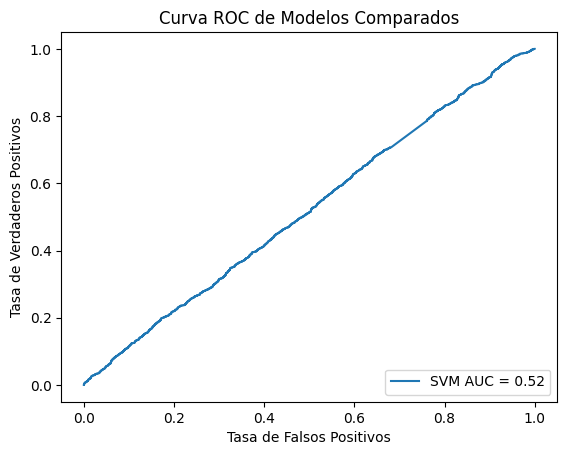

In [29]:
# Graficar todas las curvas ROC
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC de Modelos Comparados')
plt.legend(loc='lower right')
plt.show()

In [30]:
# Validación cruzada para el modelo de Regresión Logística
log_reg = LogisticRegression()
cross_val_scores = cross_val_score(log_reg, X_resampled, y_resampled, cv=5, scoring='accuracy')
print(f"Exactitud media en la validación cruzada (Regresión Logística): {cross_val_scores.mean()}")

Exactitud media en la validación cruzada (Regresión Logística): 0.5113068220053266


In [31]:
 # Importancia de características (Random Forest)
rf_model = RandomForestClassifier()
rf_model.fit(X_train_resampled, y_train_resampled)
importances = rf_model.feature_importances_

    # Mostrar la importancia de cada característica
feature_names = ['sessions', 'drives', 'total_sessions']
for feature, importance in zip(feature_names, importances):
    print(f'Importancia de {feature}: {importance:.4f}')

2024/11/07 14:33:31 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '415b3e950fcd431abb798368fb911ebf', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow
2024/11/07 14:33:31 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "c:\Users\colom\OneDrive - ITESO\iteso\5to semestre\cienciadatos\PROYECTO_OSKU\venv\Lib\site-packages\mlflow\types\utils.py:407: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missin

Importancia de sessions: 0.1952
Importancia de drives: 0.1813
Importancia de total_sessions: 0.6235
